# 2d image をプロットする

2次元の画像をプロットします。

## python コード

In [1]:
import n2

import numpy
import astroquery.skyview
from astropy.units import deg
from astropy.units import arcmin

%matplotlib inline
import matplotlib.pyplot

[13:05:03,075] INFO: python 3.6.5
[13:05:03,077] INFO: n2-tools 0.0.6


In [2]:
target = 'M42'
survey = 'DSS2 Red'
radius = 1.5 * deg
pixels = 1000

In [3]:
urls = astroquery.skyview.SkyView.get_image_list(target, survey, radius=radius, pixels=pixels)
urls

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv42193127026774.fits']

In [4]:
d = n2.open_fits(urls[0])

[13:05:05,448] INFO: (open_fits) path=https://skyview.gsfc.nasa.gov/tempspace/fits/skv42193127026774.fits, hdu_num=0
[13:05:05,466] WARNING: (verify_header) Empty keyword: BUNIT
[13:05:05,467] WARNING: (verify_header) Empty keyword: BMAJ
[13:05:05,468] WARNING: (verify_header) Empty keyword: BMIN


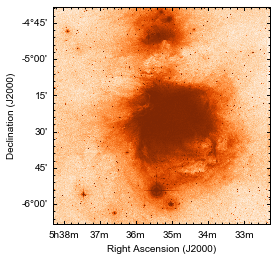

In [6]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection=d.wcs)
ax.imshow(numpy.log10(d.data), vmin=numpy.log10(4e3), vmax=numpy.log10(2e4), cmap='Oranges')
ax.set_xlim(0, d.data.shape[1])
ax.set_ylim(0, d.data.shape[0])
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[0].set_major_formatter('hh:mm')
ax.coords[0].set_ticks(spacing=15*arcmin)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].set_axislabel('Declination (J2000)')
ax.coords[1].set_major_formatter('dd:mm')
ax.coords[1].set_ticks(spacing=15*arcmin)
ax.coords[1].display_minor_ticks(True)
fig.savefig('plot-optical-image.jpg', dpi=50)